# Example of extracting table data from Microsoft PPT documents

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11"

In [2]:
import os
import sys

if license:
    os.environ['JSL_OCR_LICENSE'] = license

In [3]:
# install from PYPI using secret
#%pip install spark-ocr==$version+spark30 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade
#%pip install --upgrade spark-ocr==4.0.0+spark32 --user --extra-index-url https://pypi.johnsnowlabs.com/$secret --upgrade

In [4]:
# or install from local path
#%pip install ../../python/dist/spark-ocr-3.8.0+spark30.tar.gz

## Initialization of spark session

In [5]:
from sparkocr import start

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark.sparkContext.setLogLevel("ERROR")
spark

Spark version: 3.1.3
Spark NLP version: 4.0.0
Spark NLP for Healthcare version: 4.0.0
Spark OCR version: 4.0.1



## Import OCR transformers

In [6]:
from sparkocr.transformers import *
from sparkocr.utils import display_images
from sparkocr.enums import *

## Read PPT document as binary file

In [7]:
import pkg_resources
ppt_example = pkg_resources.resource_filename('sparkocr', 'resources/ocr/ppt/37625.ppt')
ppt_example_df = spark.read.format("binaryFile").load(ppt_example).cache()

## Preview document using `PptToPdf` and `PdfToImage` transformers


    Image #0:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/ppt/37625.ppt
    Resolution: 300 dpi
    Width: 2479 px
    Height: 3508 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


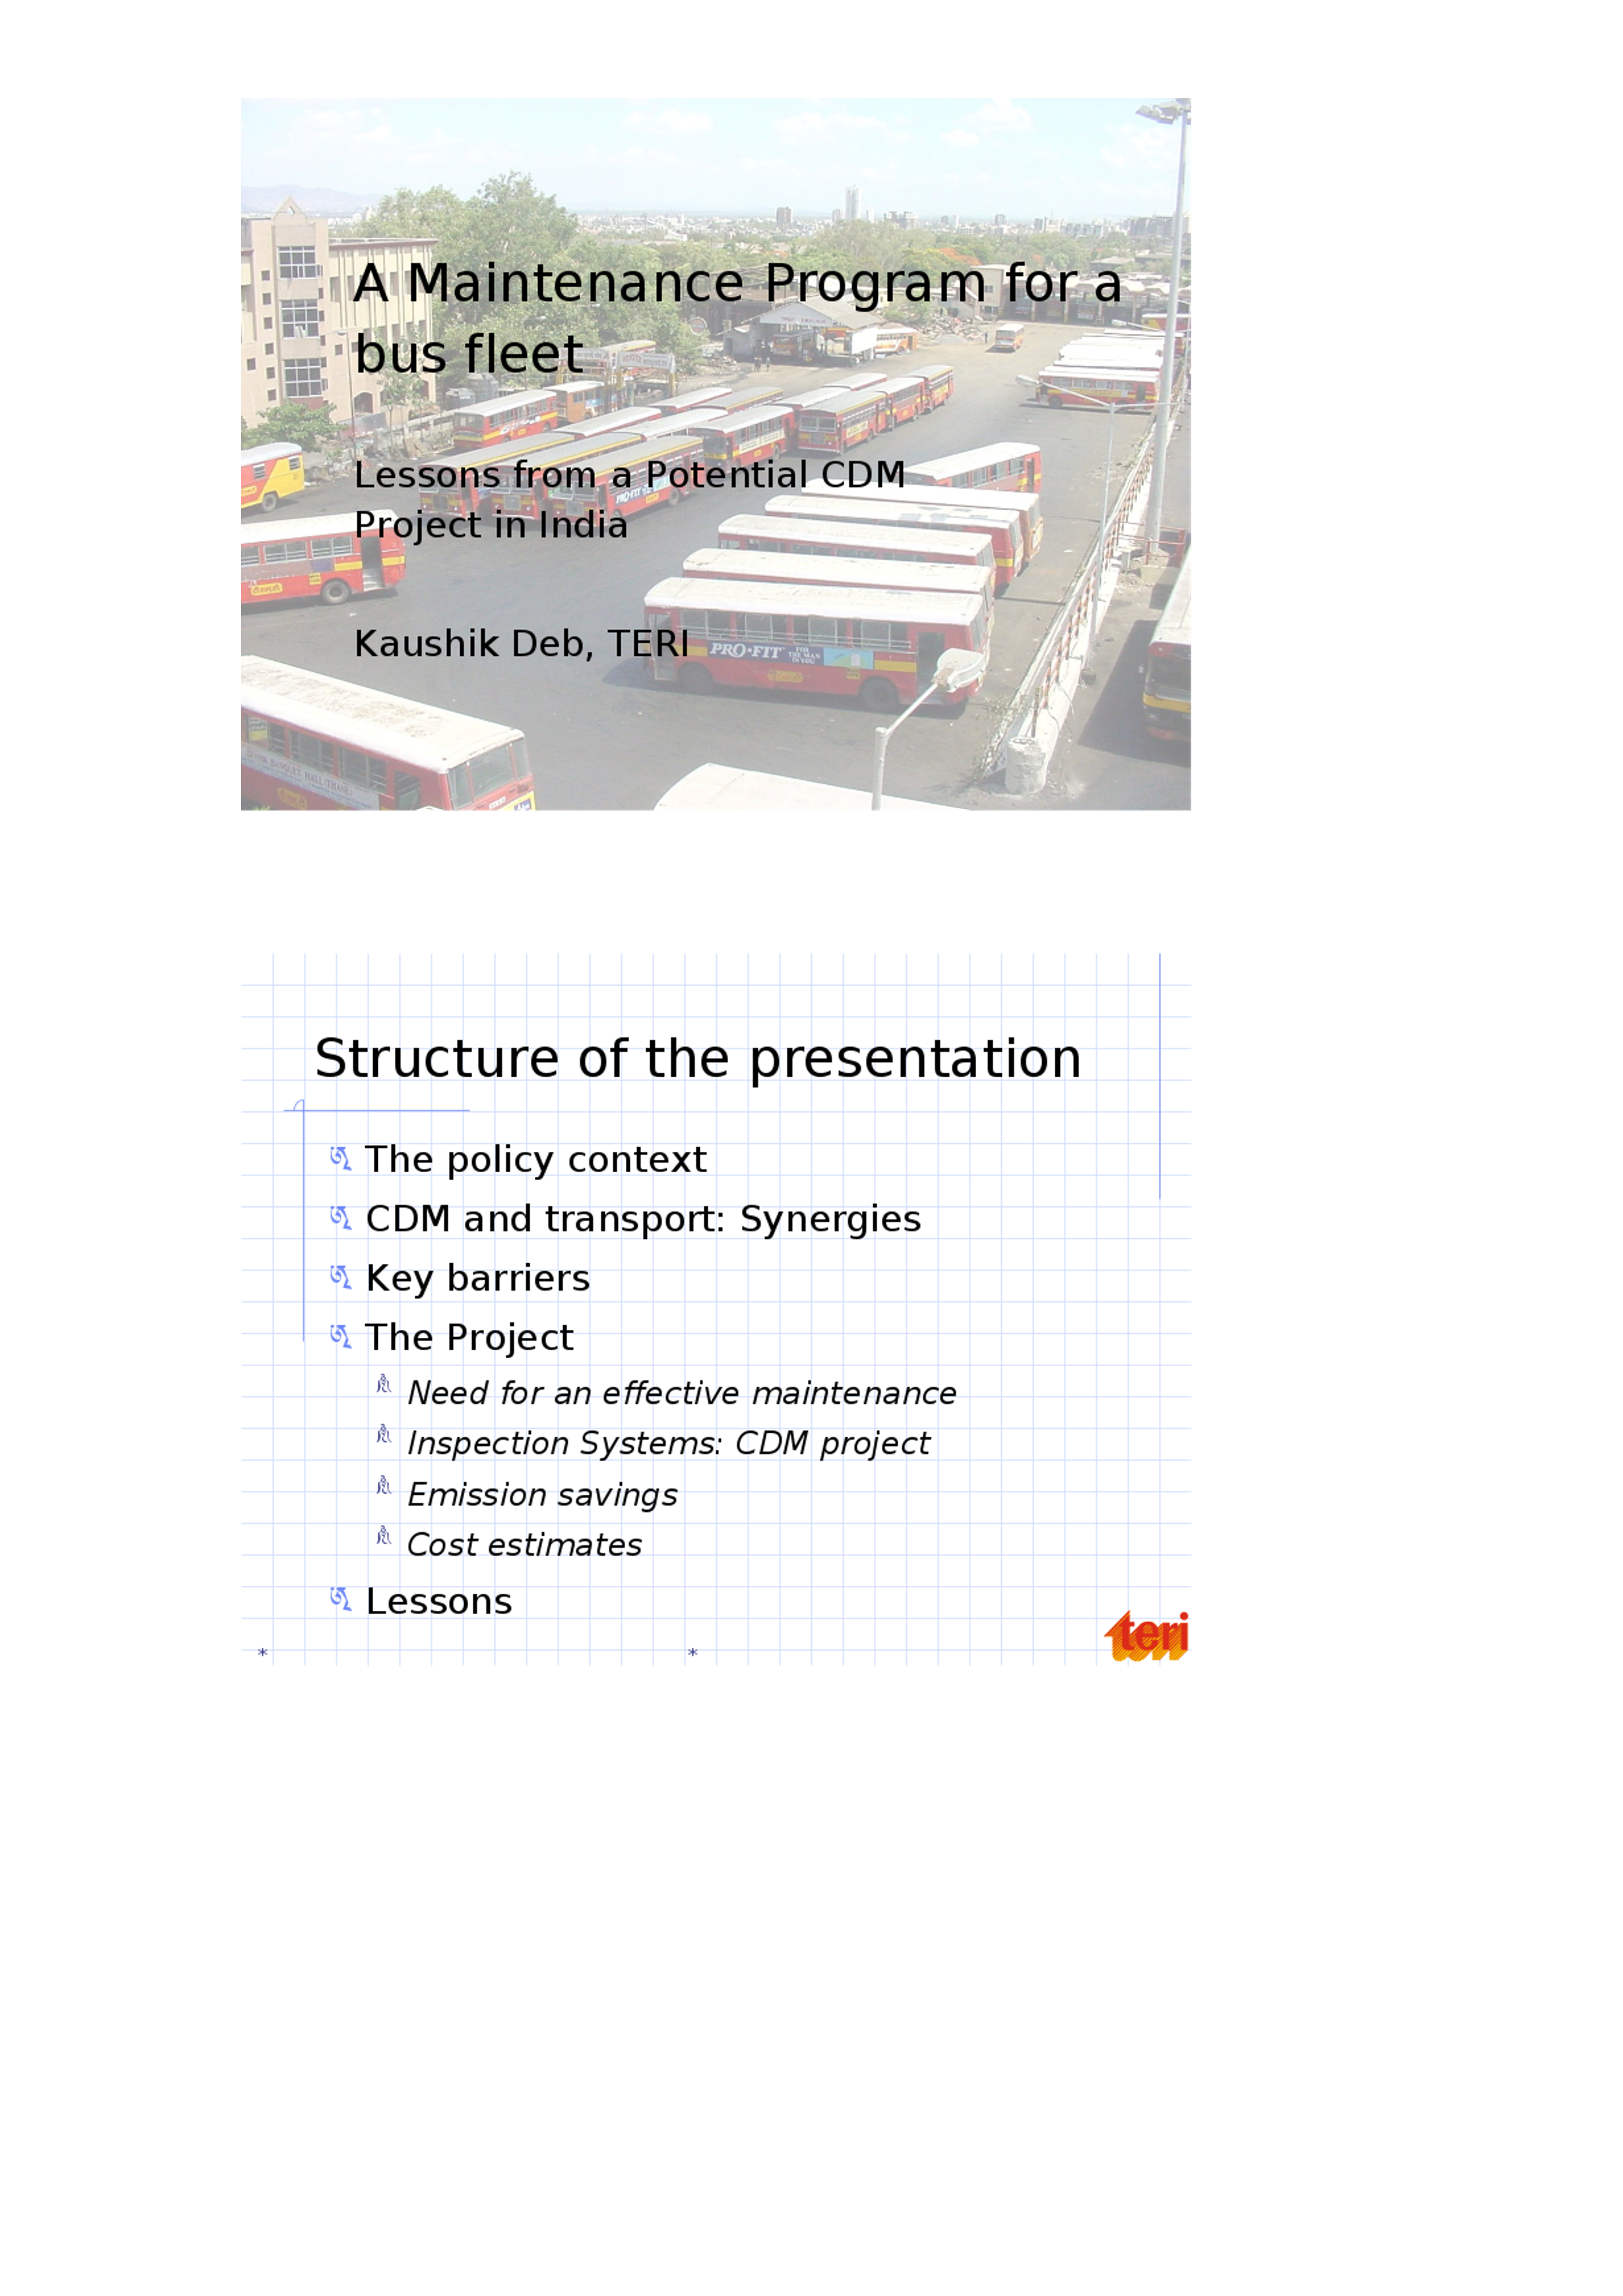


    Image #1:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/ppt/37625.ppt
    Resolution: 300 dpi
    Width: 3000 px
    Height: 2250 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


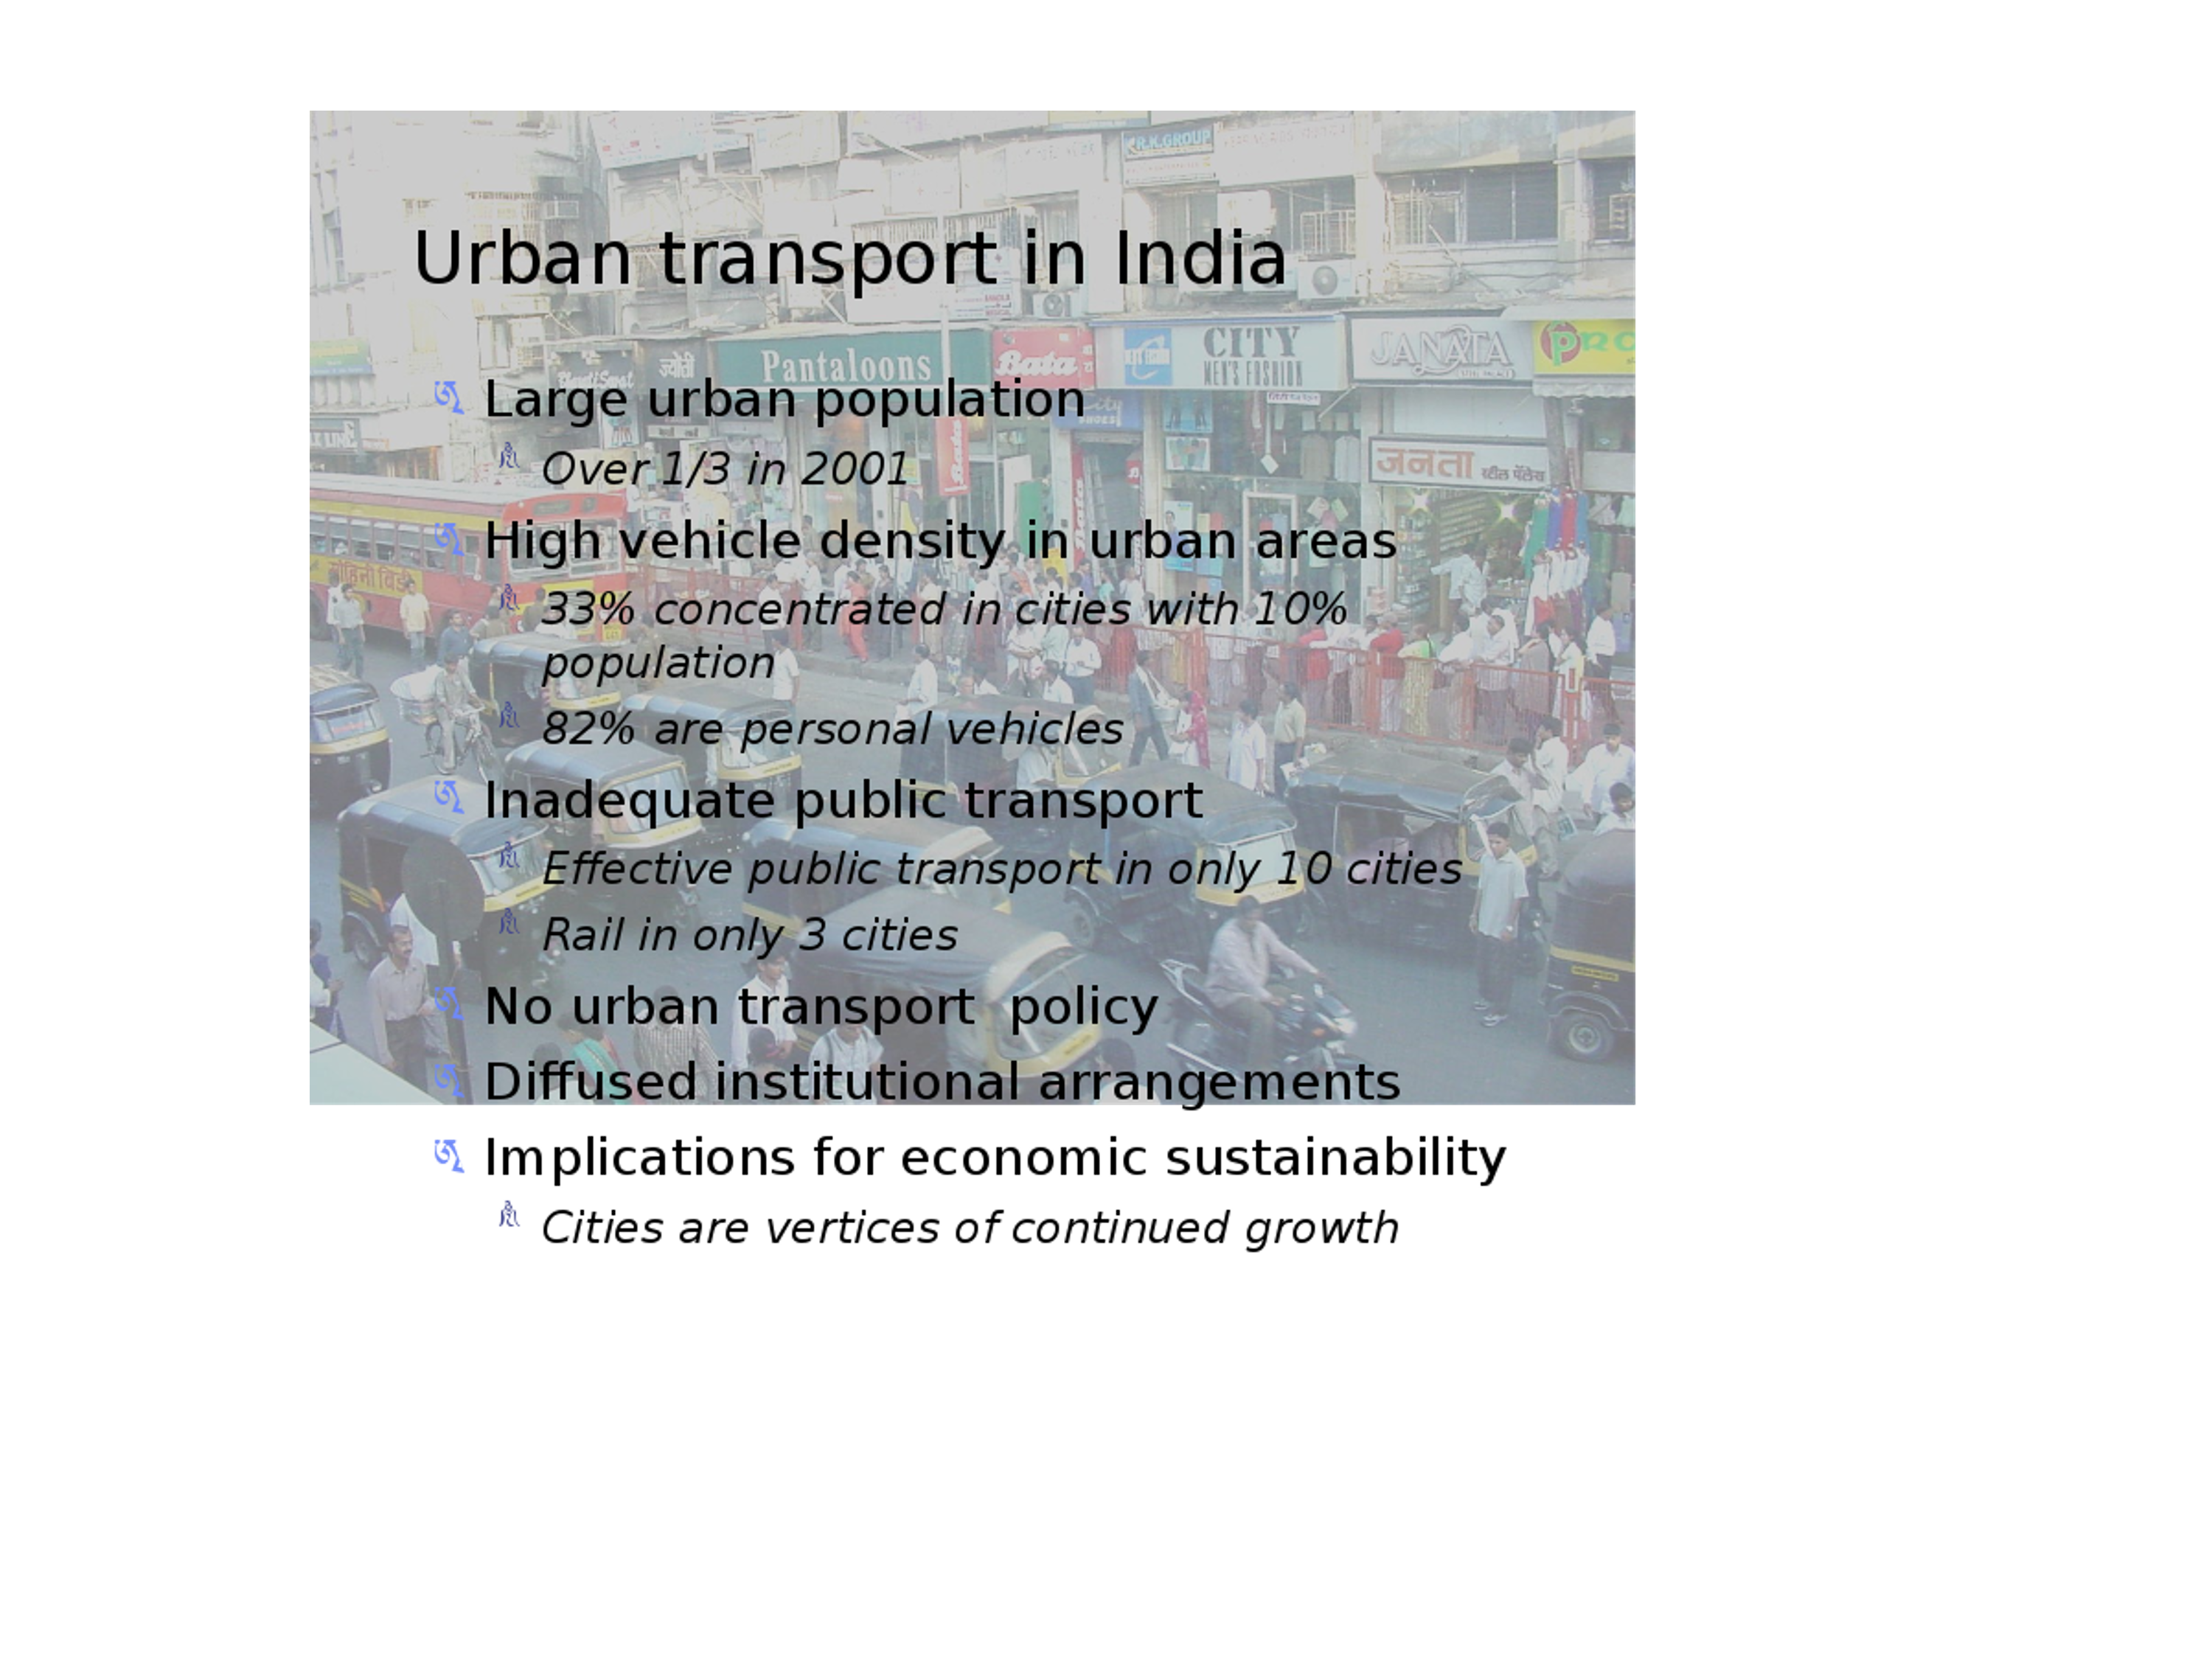


    Image #2:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/ppt/37625.ppt
    Resolution: 300 dpi
    Width: 3000 px
    Height: 2250 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


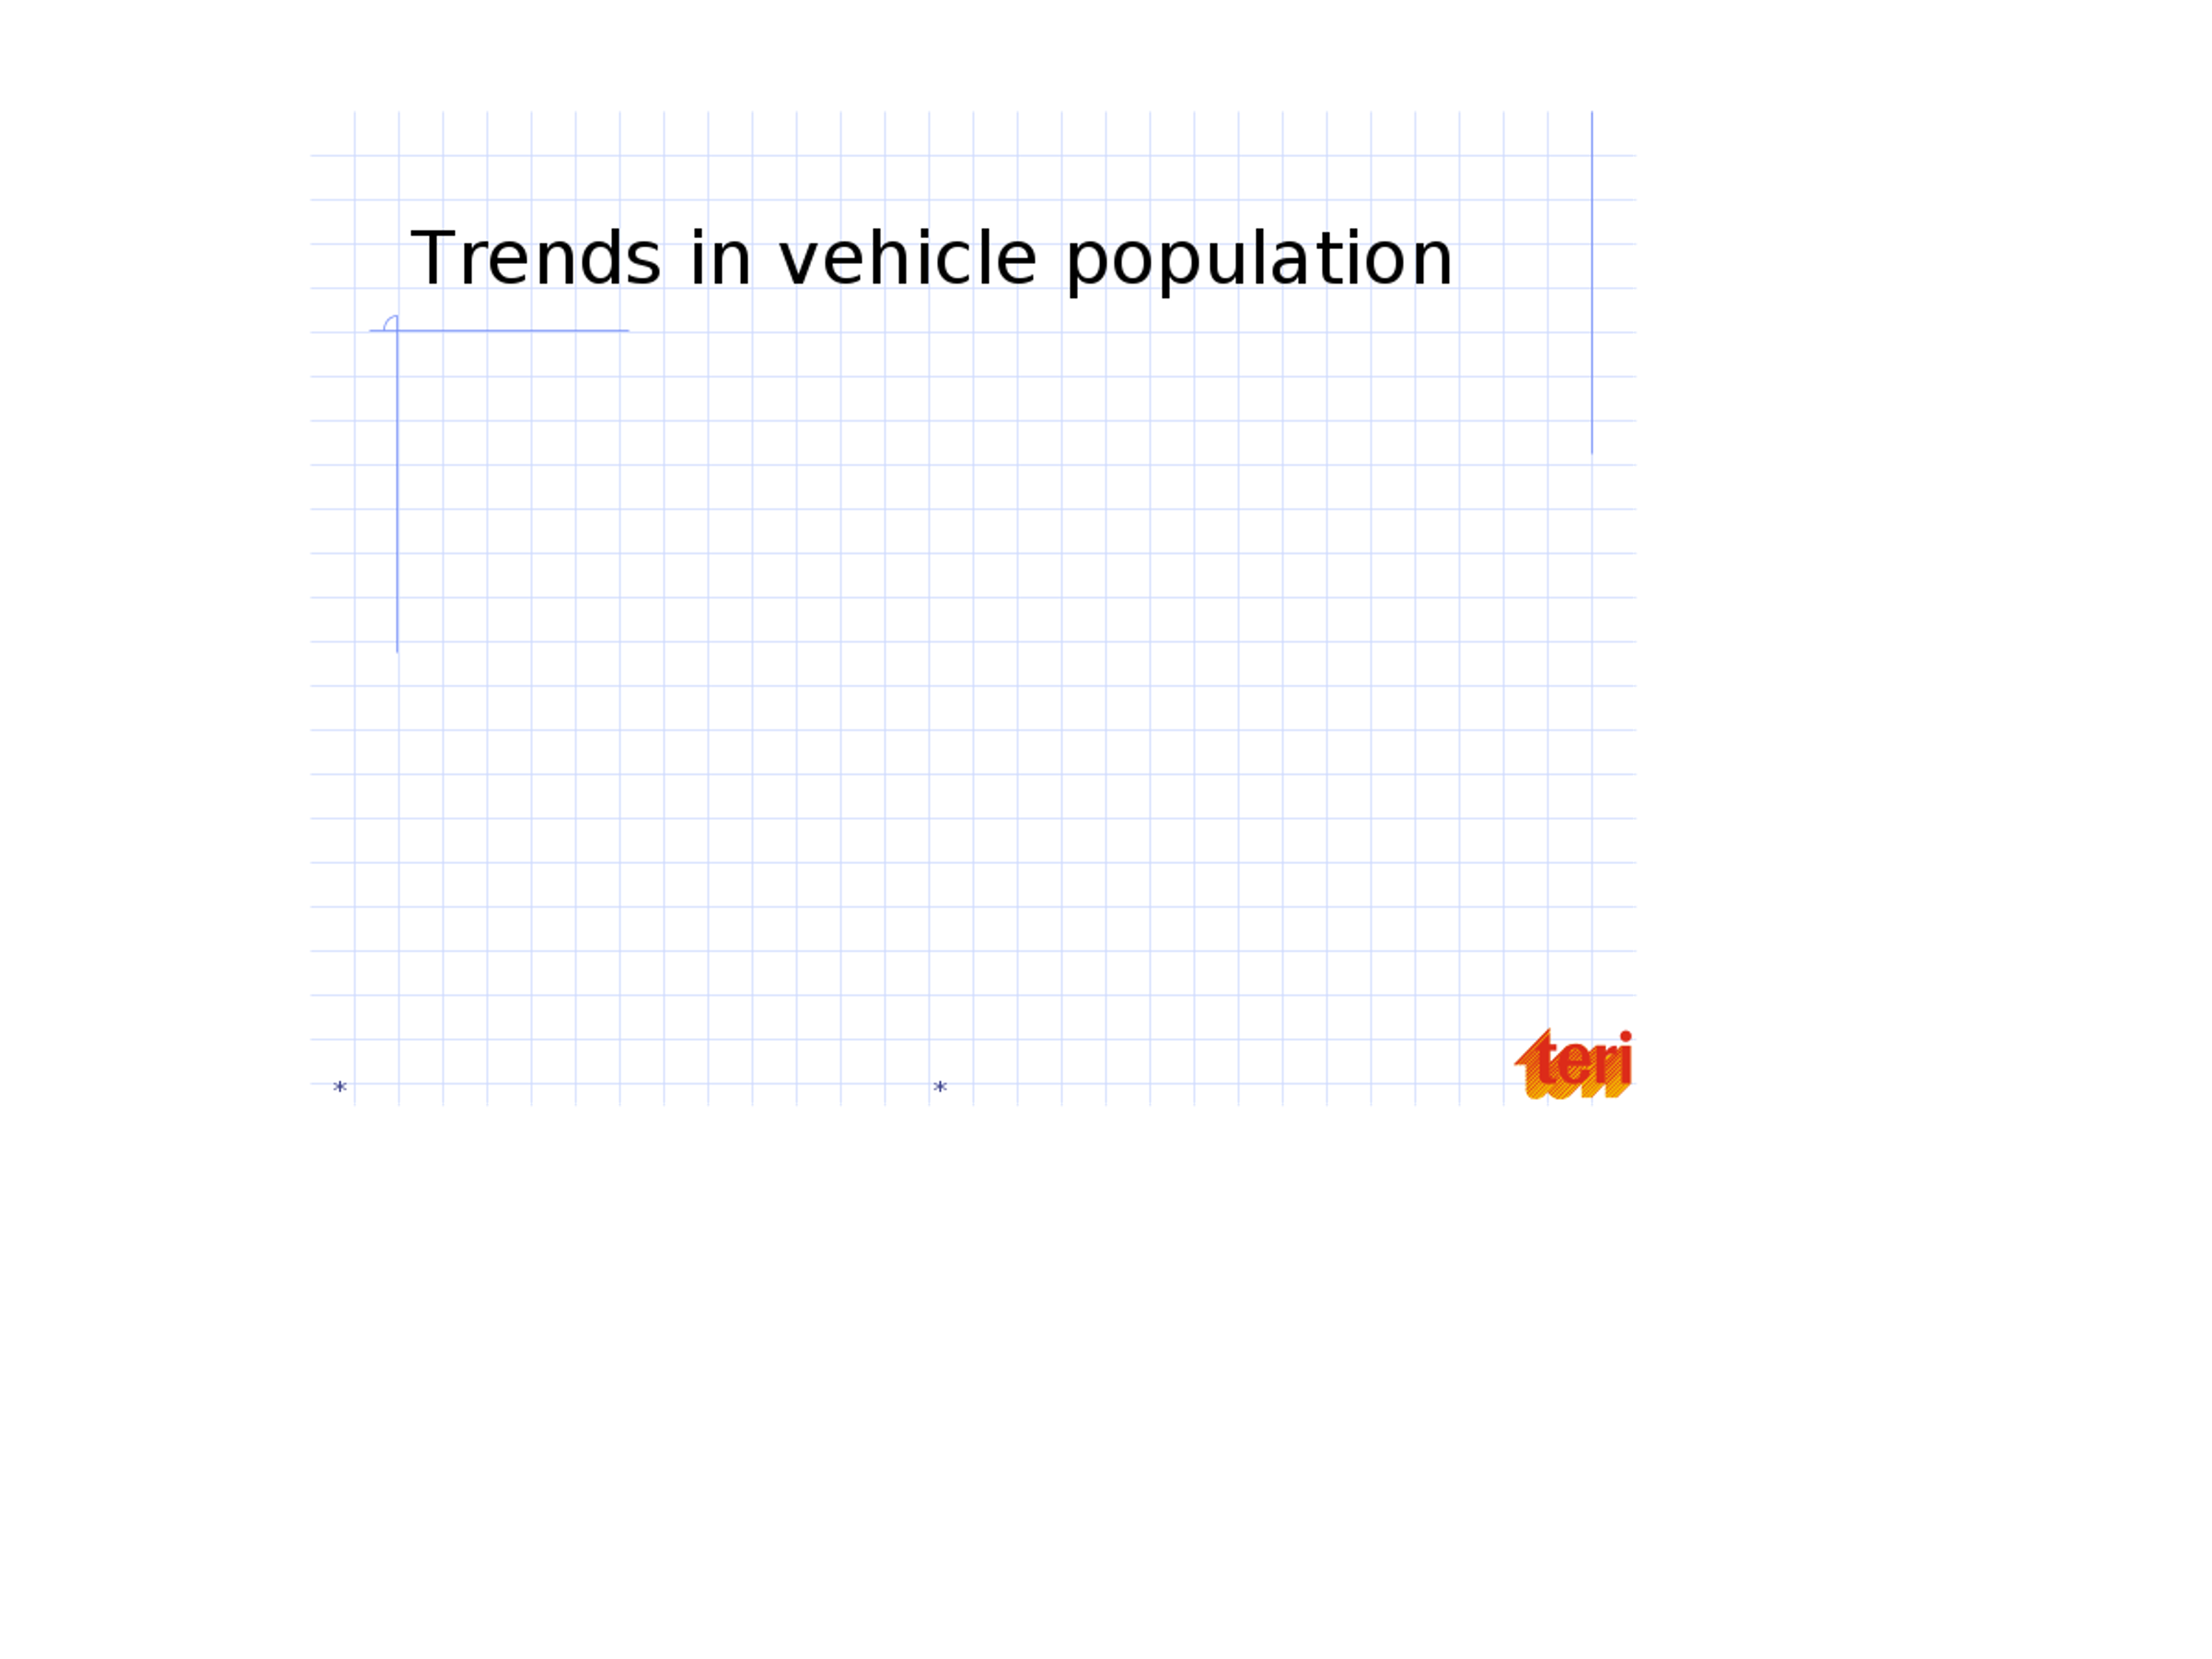


    Image #3:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/ppt/37625.ppt
    Resolution: 300 dpi
    Width: 3000 px
    Height: 2250 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


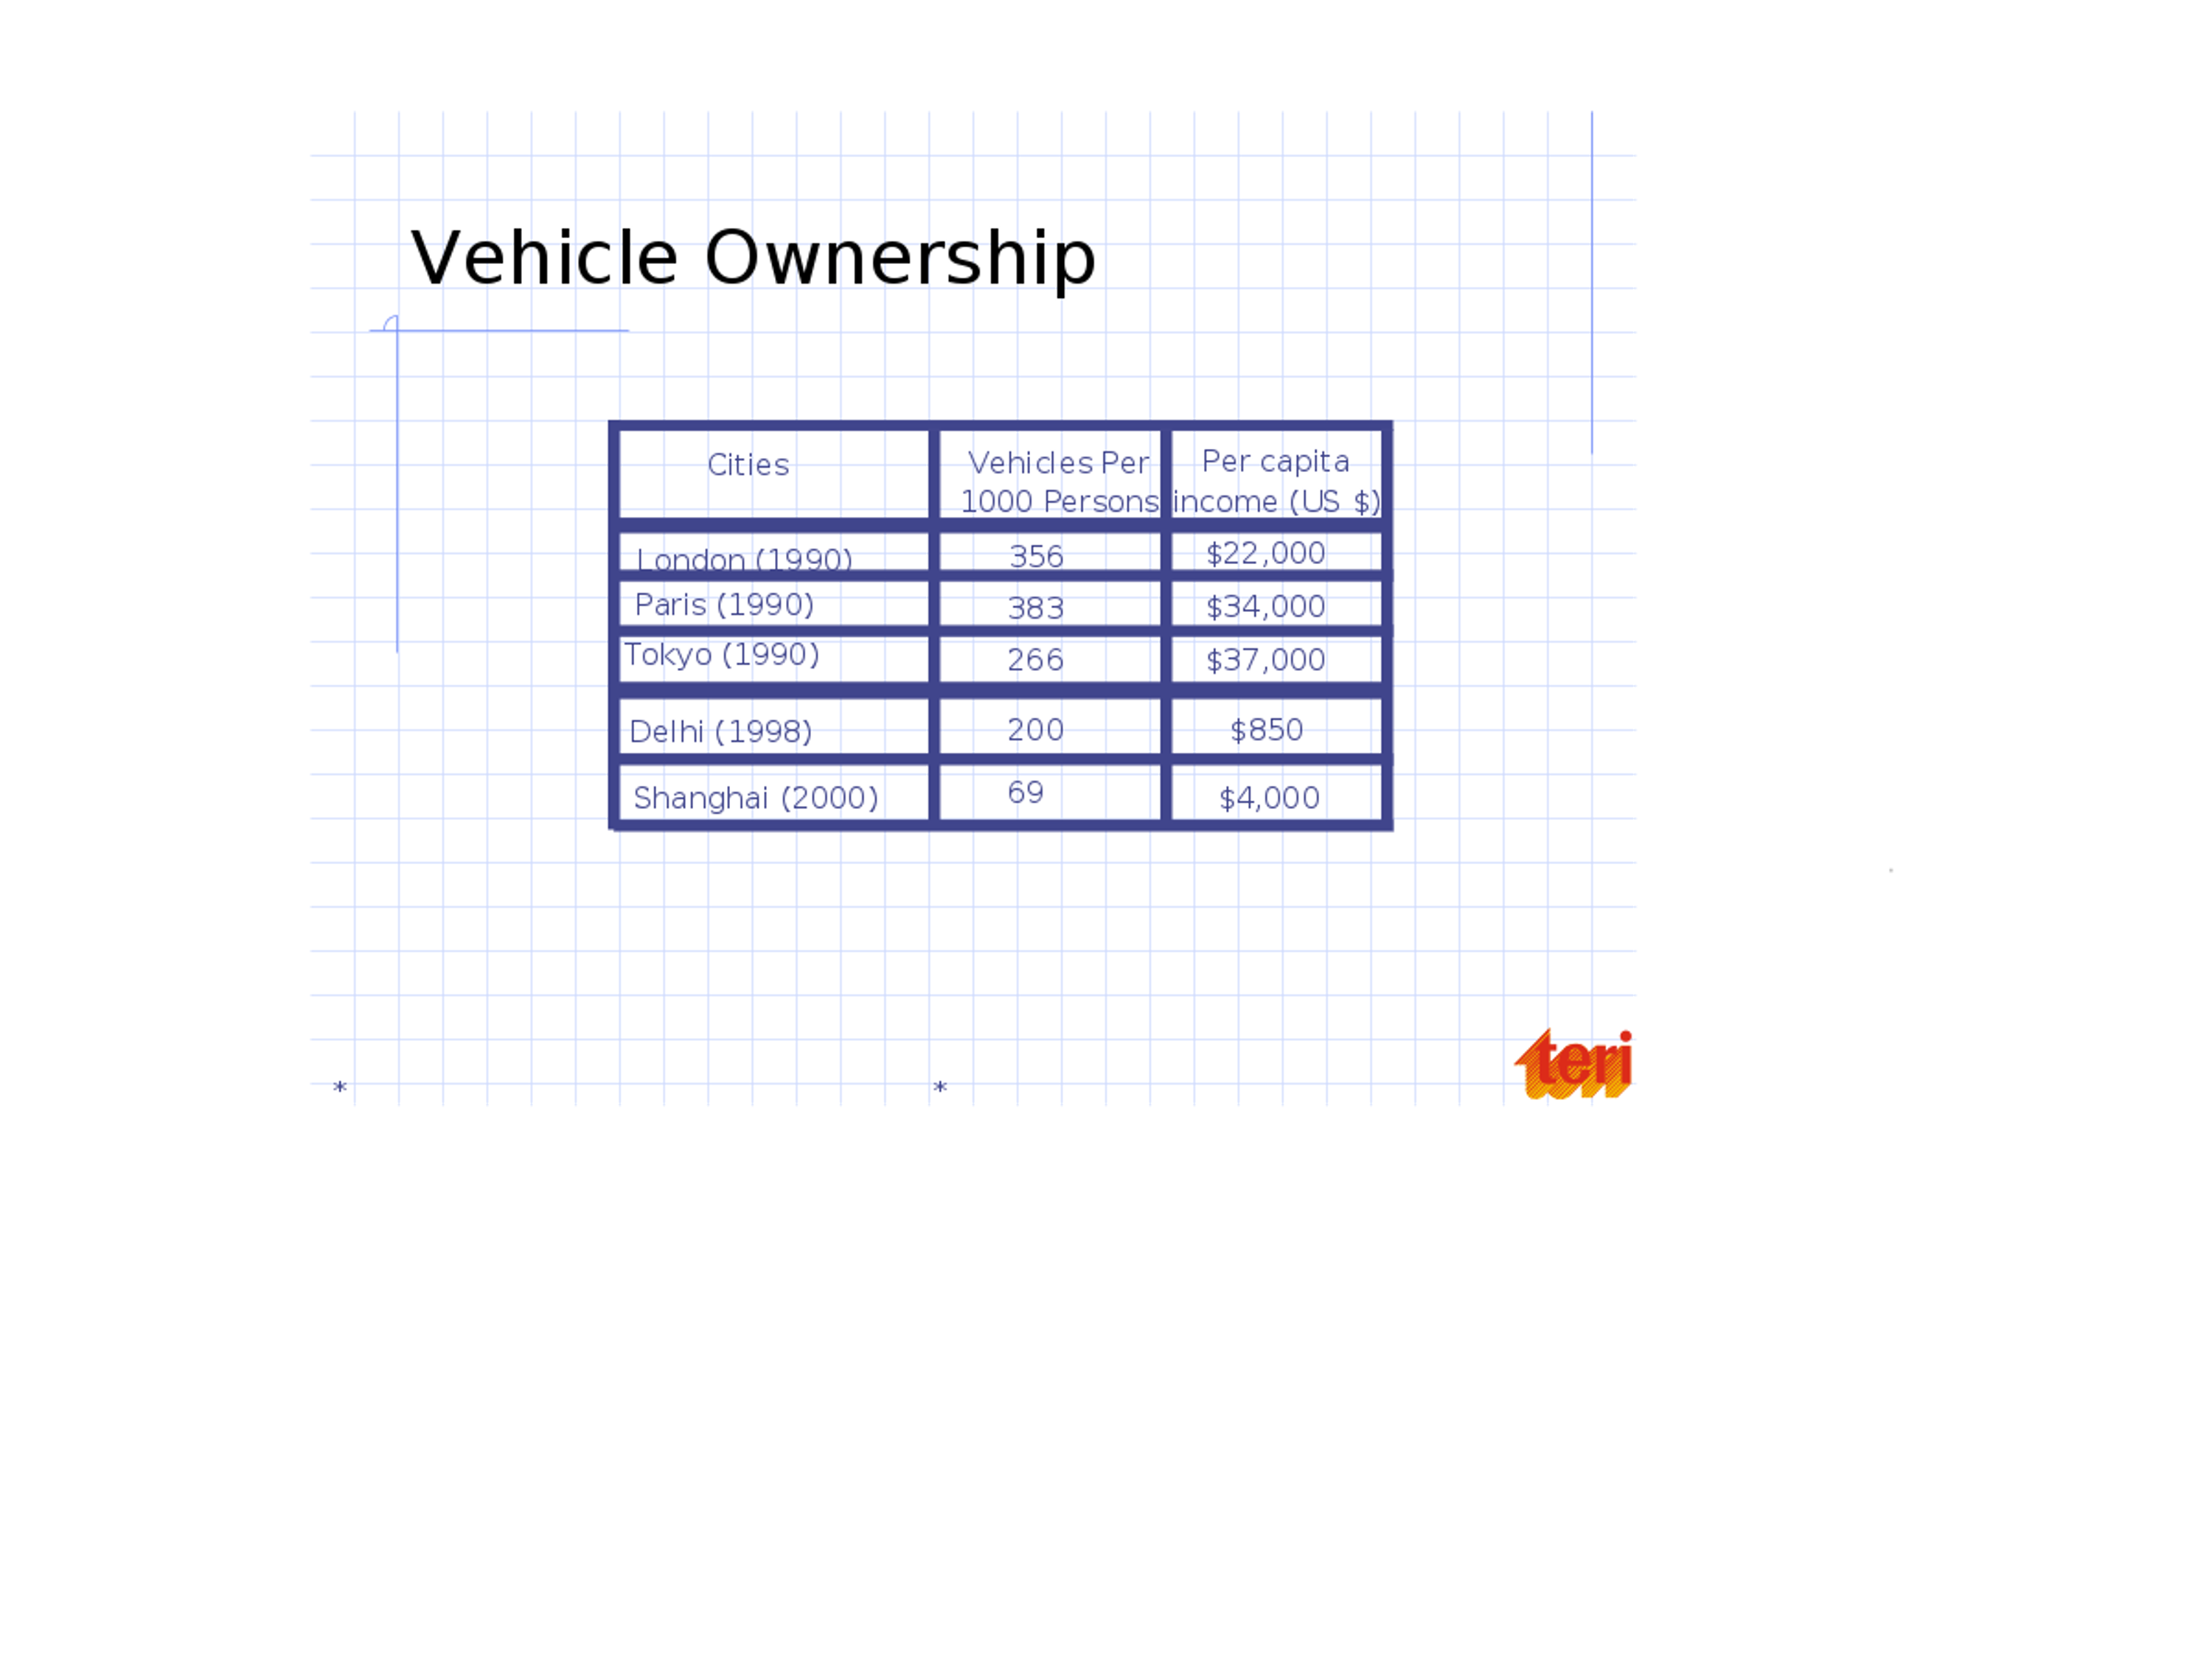


    Image #4:
    Origin: file:/home/jose/.local/lib/python3.7/site-packages/sparkocr/resources/ocr/ppt/37625.ppt
    Resolution: 300 dpi
    Width: 3000 px
    Height: 2250 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


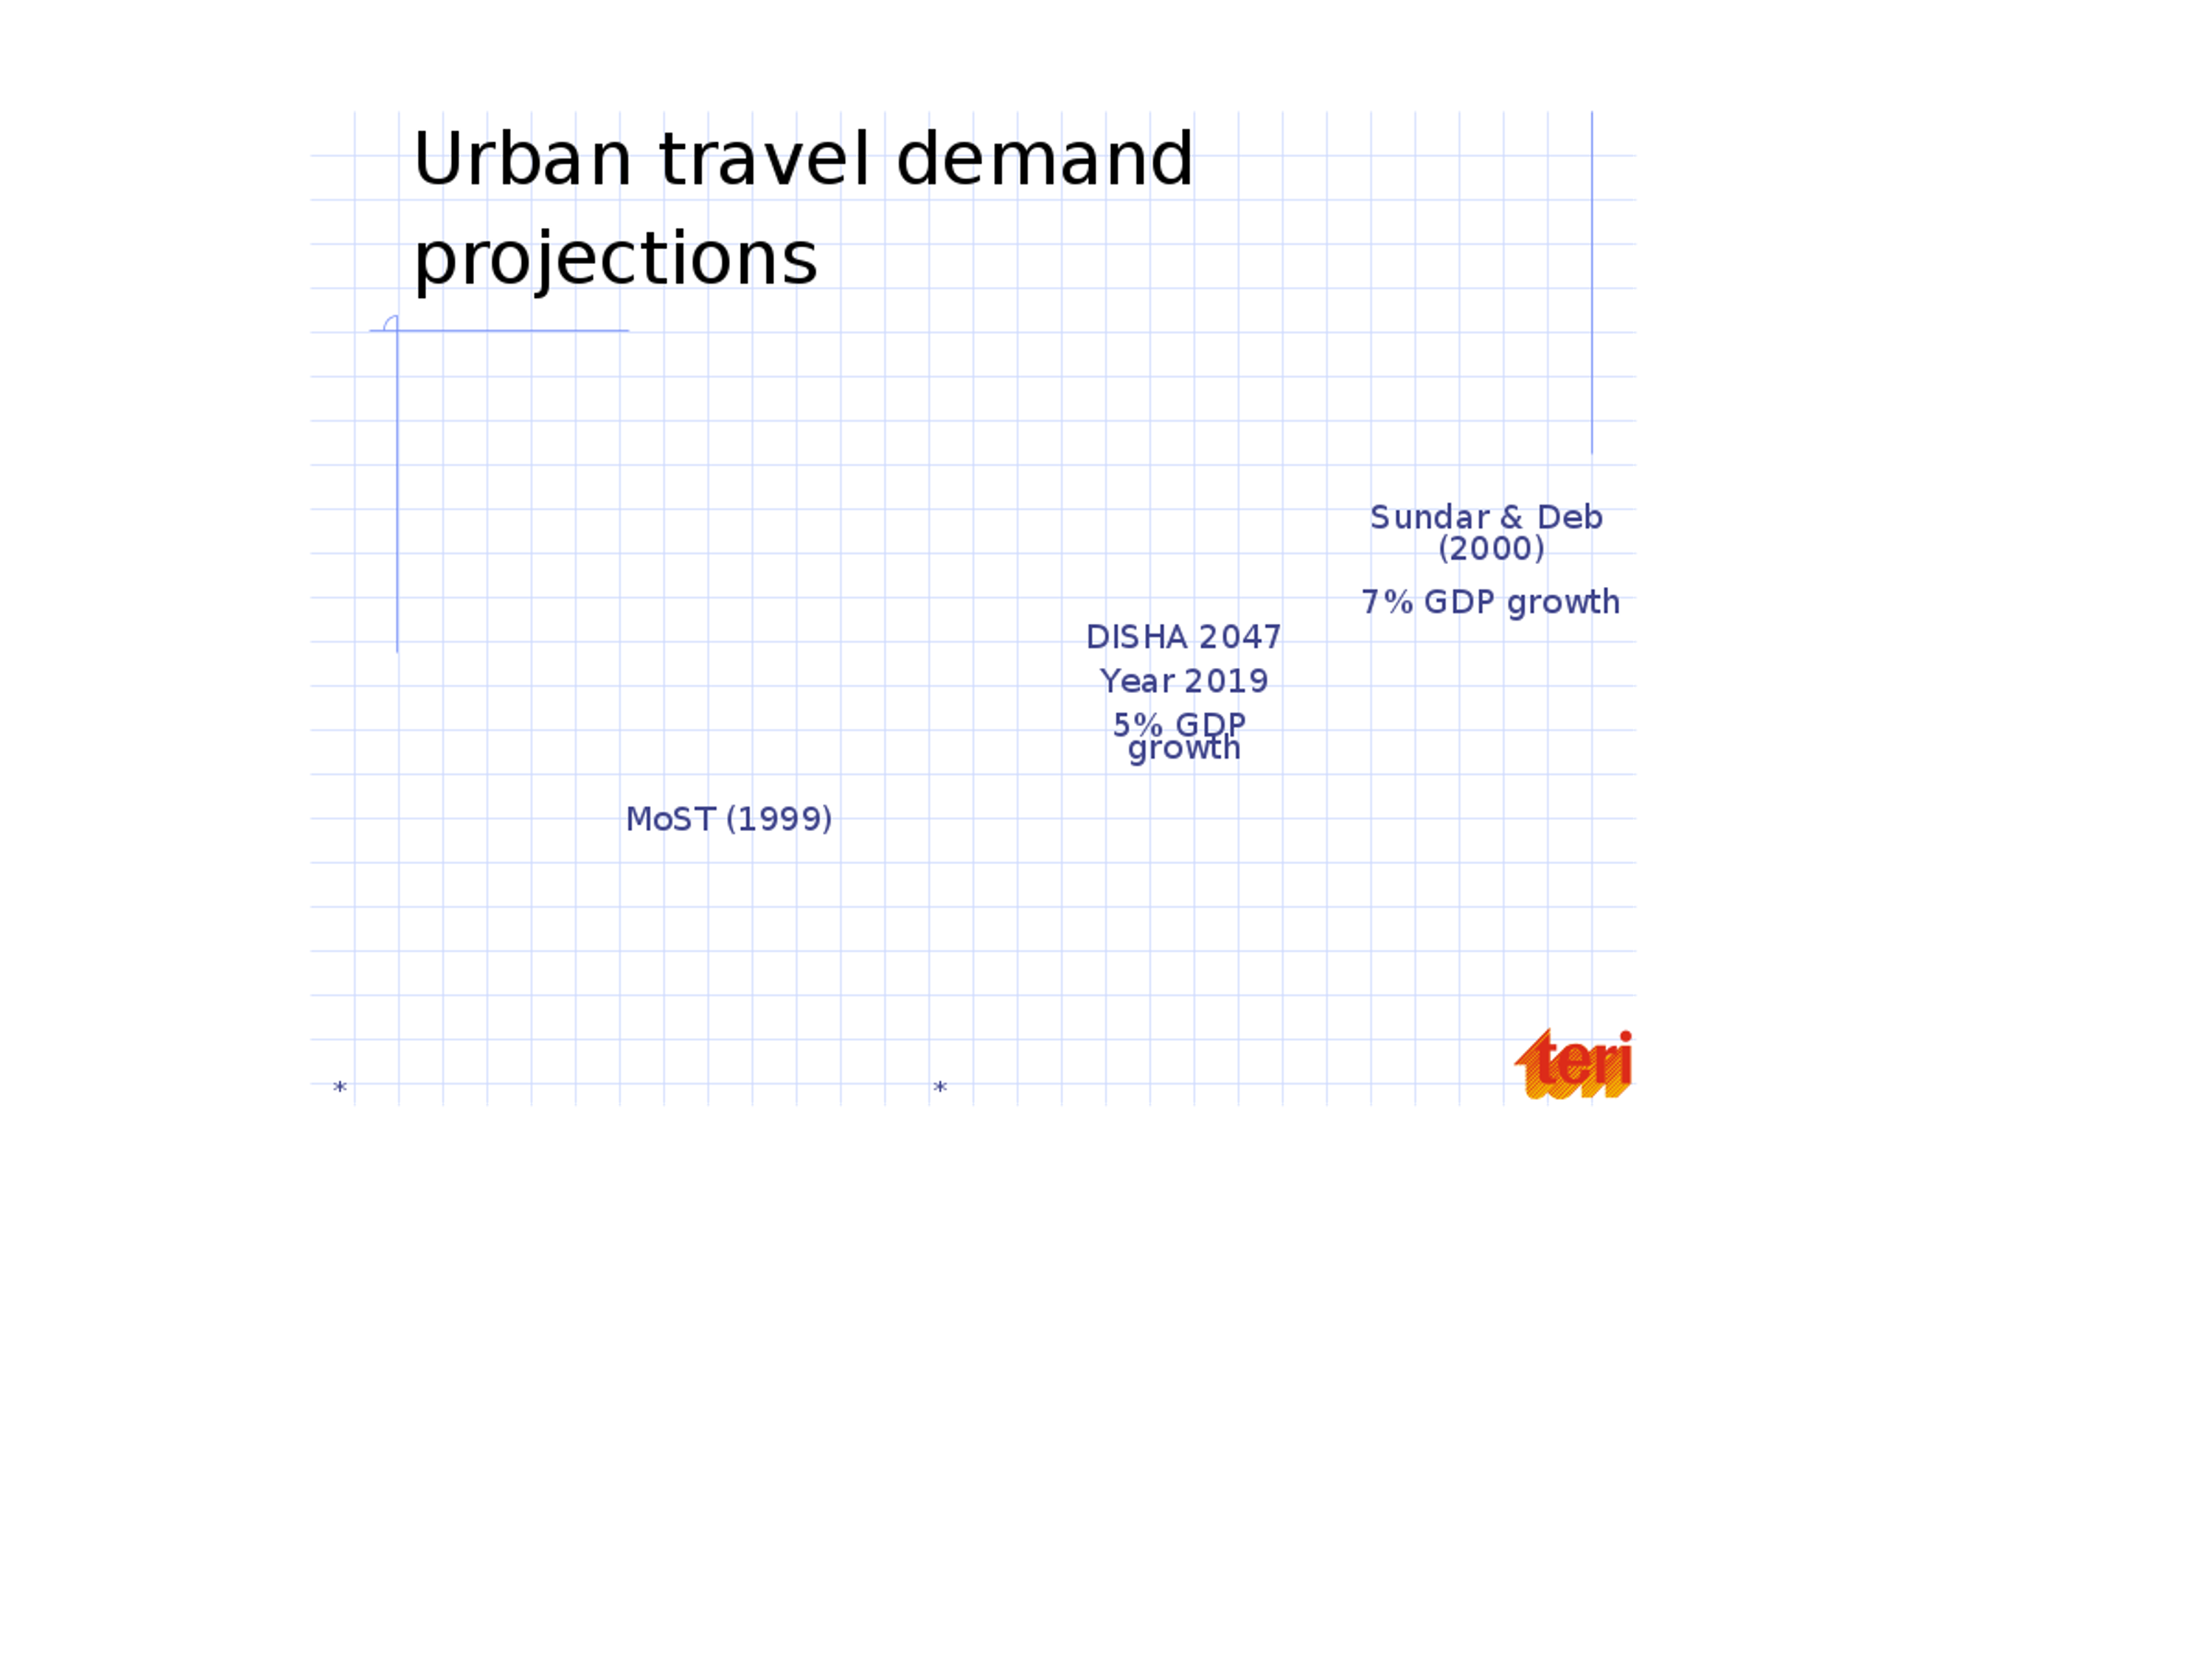

In [8]:
# convert PPT to PDF
pdf_df = PptToPdf() \
    .setOutputCol("content") \
    .transform(ppt_example_df)

# Convert PDF to image for display
image_df = PdfToImage() \
    .setImageType(ImageType.TYPE_3BYTE_BGR) \
    .transform(pdf_df)

display_images(image_df)